# Decision Tree 실습

# 1. 함수 익히기 및 모듈 불러오기

- 함수 익히기

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [2]:
clf.predict([[1, 1]])

array([1])

- 모듈 불러오기

In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
from os import system

In [4]:
system("pip install graphviz")

0

In [5]:
import graphviz

- 데이터 로드

In [6]:
iris = load_iris()

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2. 의사결정나무 구축 및 시각화

- 트리 구축

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

- 트리의 시각화

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled= True, rounded= True, special_characters=True)
graph = graphviz.Source(dot_data)

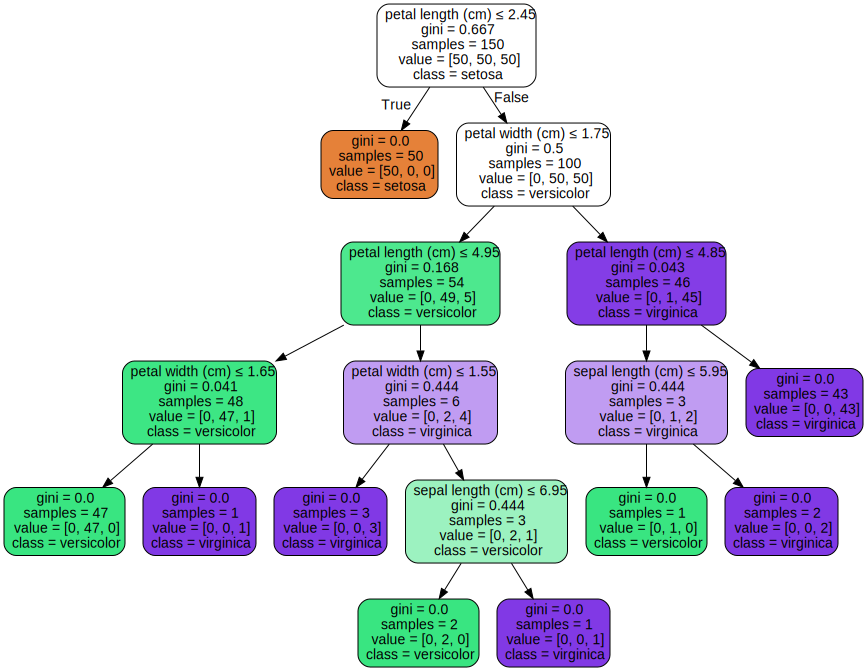

In [16]:
graph

- 엔트로피를 활용한 트리

In [19]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy")

In [20]:
clf2.fit(iris.data, iris.target)

DecisionTreeClassifier(criterion='entropy')

In [21]:
dot_data2 = tree.export_graphviz(clf2, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled= True, rounded= True, special_characters=True)
graph2 = graphviz.Source(dot_data2)

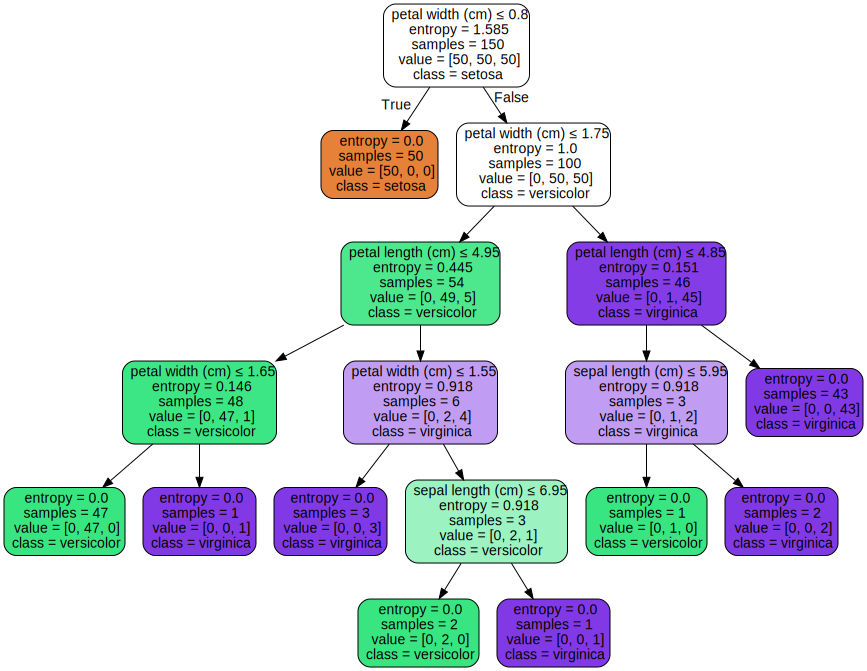

In [22]:
graph2

- 프루닝

In [23]:
clf3=tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [24]:
clf3.fit(iris.data, iris.target)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

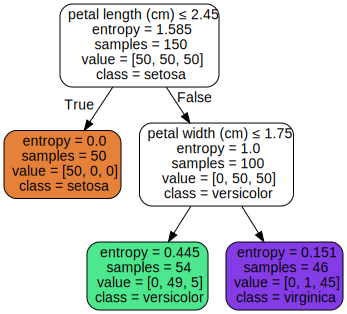

In [25]:
dot_data3 = tree.export_graphviz(clf3, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled= True, rounded= True, special_characters=True)
graph3 = graphviz.Source(dot_data3)
graph3

- Confusion Matrix 구하기

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target,clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [27]:
confusion_matrix(iris.target,clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [28]:
confusion_matrix(iris.target,clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

# 3. Training - Test 구분 및 Confusion matrix 계산

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=42)

In [34]:
clf4 = tree.DecisionTreeClassifier(criterion="entropy")

In [35]:
clf4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
print(clf4.score(X_test, y_test))
confusion_matrix(y_test, clf4.predict(X_test))


0.9736842105263158


array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]], dtype=int64)

# 4. Decision regression tree

- 모듈 불러오기 및 데이터 생성

In [42]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- Regression tree 구축

In [43]:
regr1 = tree.DecisionTreeRegressor(max_depth=2)
regr2 = tree.DecisionTreeRegressor(max_depth=5)

In [44]:
regr1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [45]:
regr2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [47]:
X_test=np.arange(0.0,5.0,0.01)[:, np.newaxis]
X_test

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [48]:
y_1=regr1.predict(X_test)
y_2=regr2.predict(X_test)

In [49]:
y_1

array([ 0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.05236068,  0.05236068,  0.05236068,
        0.05236068,  0.05236068,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71382568,
        0.71382568,  0.71382568,  0.71382568,  0.71382568,  0.71

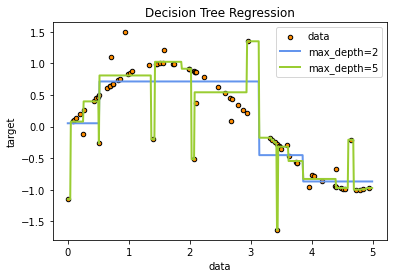

In [56]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [57]:
dot_data4 = tree.export_graphviz(regr2, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

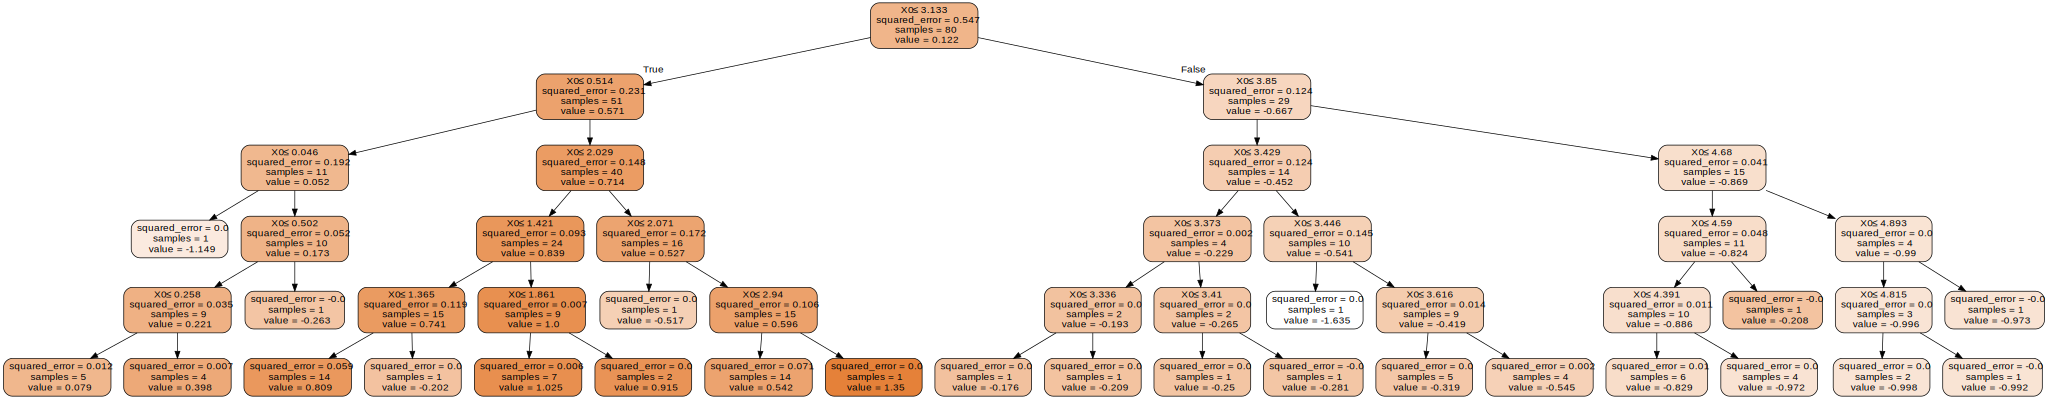

In [58]:
graph4 = graphviz.Source(dot_data4) 
graph4

In [59]:
dot_data5 = tree.export_graphviz(regr1, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

In [62]:
graph5=graphviz.Source(dot_data5)

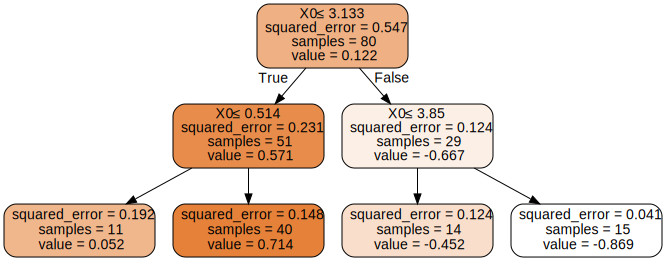

In [63]:
graph5